In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

#tabular data imports :
import pandas as pd
import numpy as np
from pydataset import data


# Custom palette with specified colors
custom_palette = sns.color_palette(["#33B8C6", "#C64133", "#4682B4"])
# Using a matplotlib colormap
custom_palette2 = sns.color_palette(["#33B8C6","#50C2CE","#6DCCD6","#8AD6DE","#A7E0E6","#C4EAEE","#E1F4F6"])

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

#stats
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle_copy as w
import explore as e
import model as m
import os
directory = os.getcwd()
pd.set_option('display.max_columns', None)

In [2]:
# coverting link to cs to a df for red wine
red_df = pd.read_csv('https://query.data.world/s/frjhfwok6awc6pkoetcyiyajdilglv?dws=00000')

In [3]:
# converting link to csv to a df for white wine
white_df = pd.read_csv('https://query.data.world/s/pxb3oenf46echvzdpylyh6d6udmgw4?dws=00000')

In [4]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [5]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


In [6]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
white_df.quality.describe()

count               4,898.00
mean                    5.88
std                     0.89
min                     3.00
25%                     5.00
50%                     6.00
75%                     6.00
max                     9.00
Name: quality, dtype: float64

In [9]:
red_df.quality.describe()

count               1,599.00
mean                    5.64
std                     0.81
min                     3.00
25%                     5.00
50%                     6.00
75%                     6.00
max                     8.00
Name: quality, dtype: float64

In [10]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [11]:
# Create a new index column
red_df['wine_id'] = 'red'


In [12]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_id
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,red
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,red
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,red
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,red
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,red


In [13]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_id               1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [14]:
# Create a new index column
white_df['wine_id'] = 'white'


In [15]:
white_df.shape

(4898, 13)

In [16]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine_id               4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [17]:
red_df.shape

(1599, 13)

In [18]:
df = pd.concat([white_df,red_df],axis = 0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_id               6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_id
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,white
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,white
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,white
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white


In [21]:
df.columns = df.columns.str.replace(' ', '_')

In [22]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,white
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,white
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,white
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50,5,red
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20,6,red
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,3.42,0.75,11.00,6,red
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,5,red


In [23]:
df.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [24]:
# using boolean indexing
rows = df[df['quality'] == 7]


In [25]:
rows.chlorides.describe()

count               1,079.00
mean                    0.05
std                     0.02
min                     0.01
25%                     0.03
50%                     0.04
75%                     0.05
max                     0.36
Name: chlorides, dtype: float64

## chlorides could be something common for a all wines in df


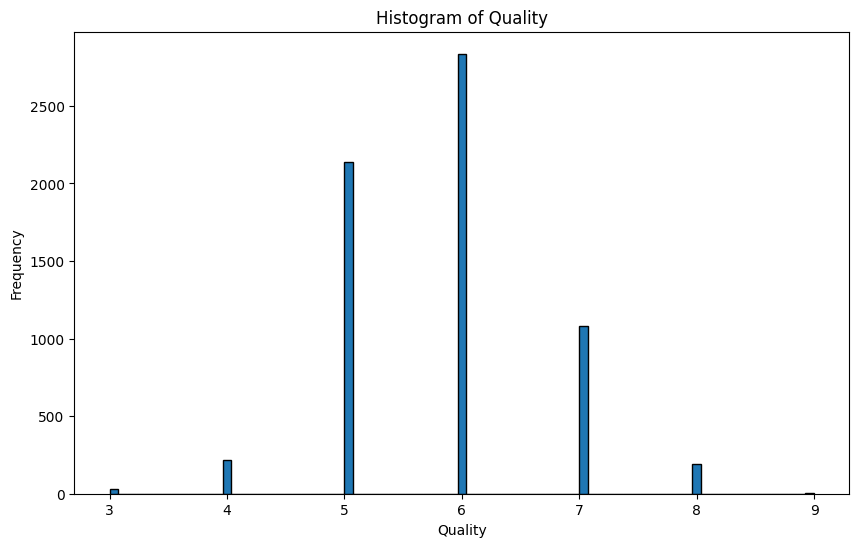

In [26]:
plt.figure(figsize=(10,6))
plt.hist(df['quality'], bins=81, edgecolor='black')
plt.title('Histogram of Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

In [27]:
def label_type(row):
    if 1 <= row['quality'] <= 4:
        return 'low'
    elif 5 <= row['quality'] <= 7:
        return 'average'
    elif 8 <= row['quality'] <= 10:
        return 'high'

df['type'] = df.apply(label_type, axis=1)

In [28]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id,type
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,white,average
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,white,average
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,white,average
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white,average
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50,5,red,average
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20,6,red,average
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,3.42,0.75,11.00,6,red,average
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,5,red,average


In [29]:
 def check_columns(df, reports=False, graphs=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe. For
    each column, it returns the column name, the number of
    unique values in the column, the unique values themselves,
    the number of null values in the column, the proportion of null values,
    the data type of the column, and the range of the column if it is float or int. The resulting dataframe is sorted by the
    'Number of Unique Values' column in ascending order.
    """
    print(f"Total rows: {df.shape[0]}")
    print(f"Total columns: {df.shape[1]}")
    if reports == True:
        describe = df.describe().round(2)
        pd.DataFrame(describe)
        print(describe)
    if graphs == True:
        df.hist(bins=20, figsize=(10, 10))
        plt.show()
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of unique values, unique values, number of null values, proportion of null values, 
        # and data type to the data list
        if df[column].dtype in ["float64", "int64"]:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    df[column].describe()[["min", "max", "mean"]].values,
                ]
            )
        else:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    None,
                ]
            )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 
    # 'Number of Null Values', 'Proportion of Null Values', 'dtype', and 'Range' (if column is float or int)
    # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

In [30]:
check_columns(df)

Total rows: 6497
Total columns: 14


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,106,0,0.00,"[7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3, 7.4, 6.5, 6.4, 6.8, 7.6, 6.9, 8.5, 5.8, ...","[3.8, 15.9, 7.215307064799138]"
1,volatile_acidity,float64,187,0,0.00,"[0.27, 0.3, 0.28, 0.23, 0.32, 0.22, 0.18, 0.16, 0.42, 0.17, 0.48, 0.66, 0.34, 0.31, 0....","[0.08, 1.58, 0.33966599969216565]"
2,citric_acid,float64,89,0,0.00,"[0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.37, 0.62, 0.38, 0.04, 0.48, 0.42, 0.14, 0....","[0.0, 1.66, 0.3186332153301524]"
3,residual_sugar,float64,316,0,0.00,"[20.7, 1.6, 6.9, 8.5, 7.0, 1.5, 1.45, 4.2, 1.2, 19.25, 1.1, 7.5, 2.9, 1.7, 1.3, 9.0, 1...","[0.6, 65.8, 5.443235339387409]"
4,chlorides,float64,214,0,0.00,"[0.045, 0.049, 0.05, 0.058, 0.044, 0.033, 0.035, 0.04, 0.032, 0.046, 0.029, 0.038, 0.0...","[0.009, 0.611, 0.05603386178236109]"
5,free_sulfur_dioxide,float64,135,0,0.00,"[45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16.0, 48.0, 41.0, 29.0, 34.0, 19.0, 25.0, 5...","[1.0, 289.0, 30.525319378174544]"
6,total_sulfur_dioxide,float64,276,0,0.00,"[170.0, 132.0, 97.0, 186.0, 136.0, 129.0, 63.0, 109.0, 75.0, 143.0, 172.0, 112.0, 99.0...","[6.0, 440.0, 115.7445744189626]"
7,density,float64,998,0,0.00,"[1.001, 0.994, 0.9951, 0.9956, 0.9949, 0.9938, 0.9908, 0.9947, 0.992, 0.9912, 1.0002, ...","[0.98711, 1.03898, 0.9946966338309989]"
8,pH,float64,108,0,0.00,"[3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14, 3.54, 2.98, 3.25, 3.24, 3.33, 3.12, 3.1...","[2.72, 4.01, 3.2185008465445586]"
9,sulphates,float64,111,0,0.00,"[0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.63, 0.52, 0.67, 0.55, 0.36, 0.39, 0.5, 0.3...","[0.22, 2.0, 0.5312682776666153]"


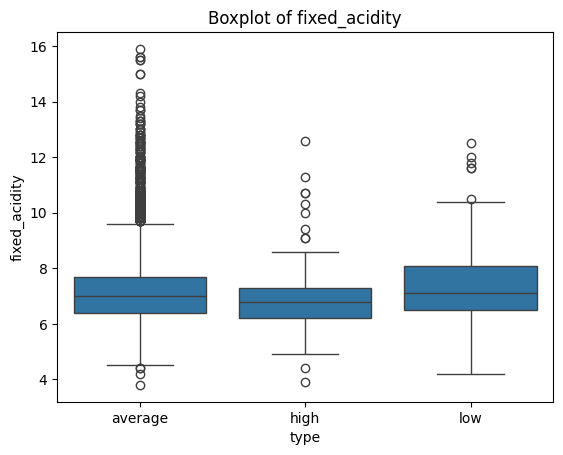

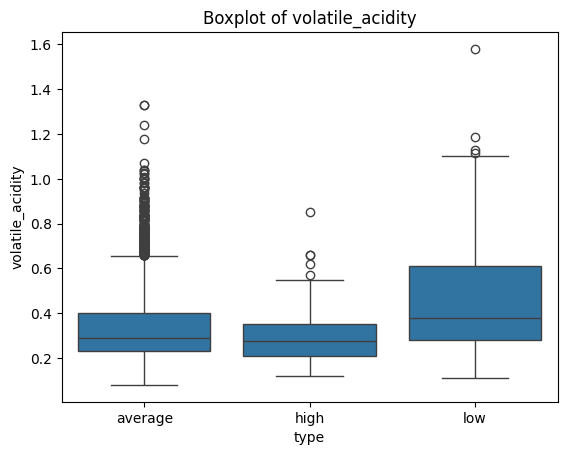

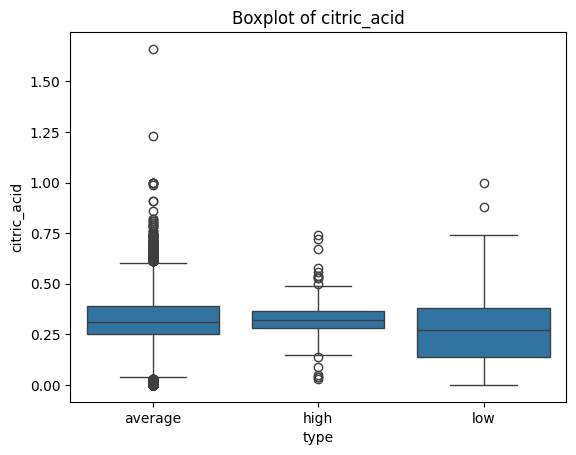

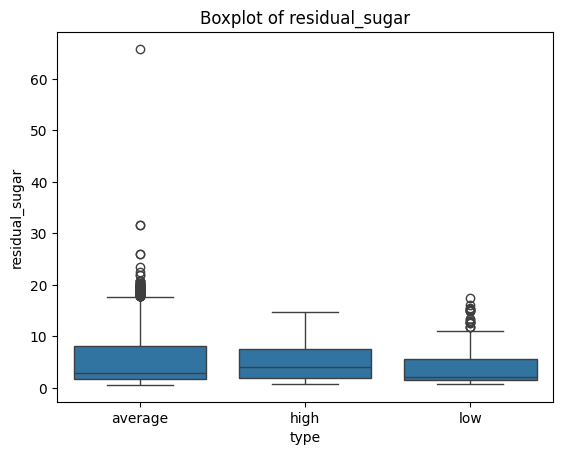

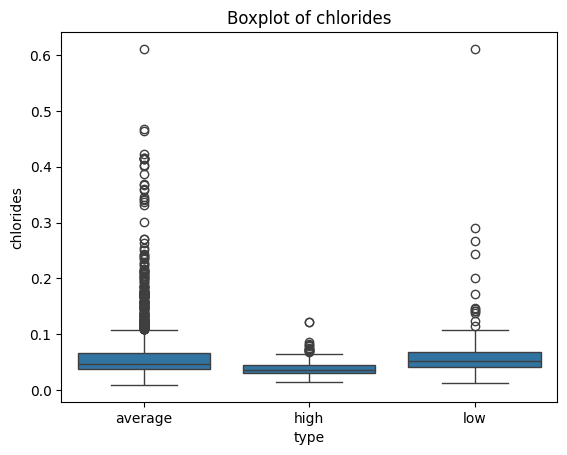

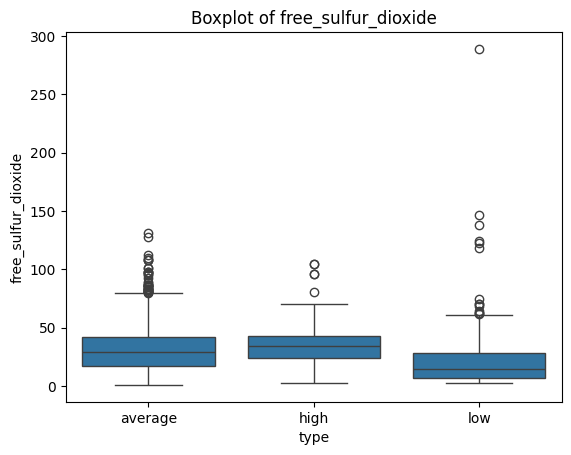

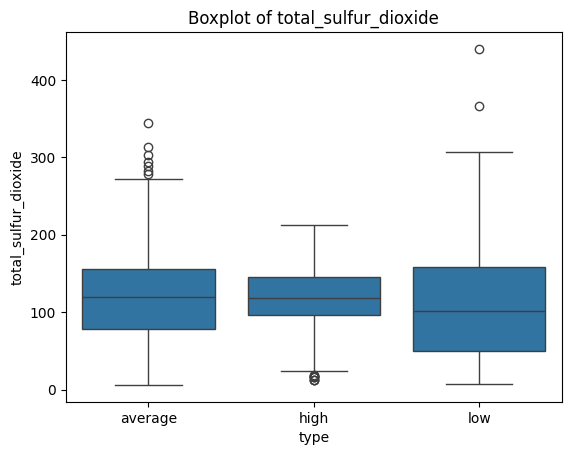

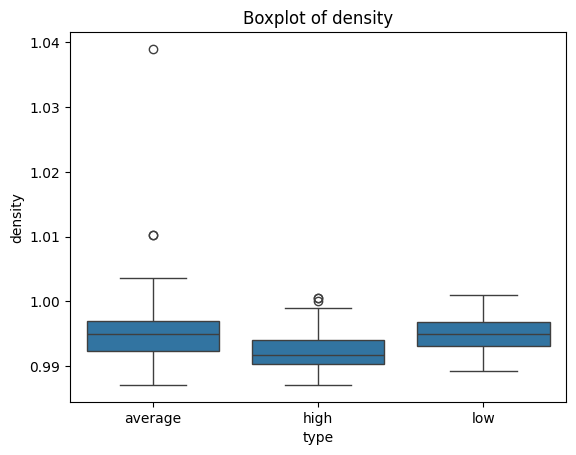

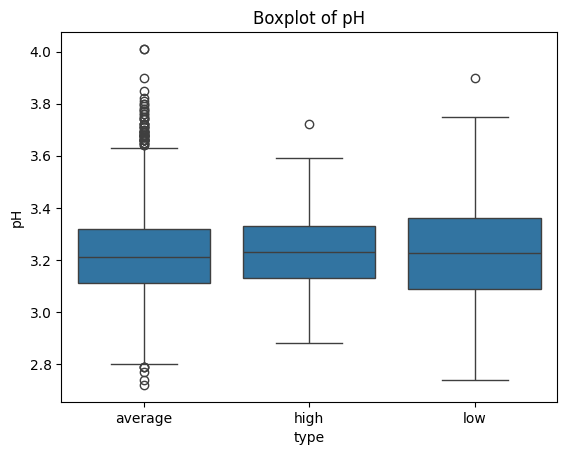

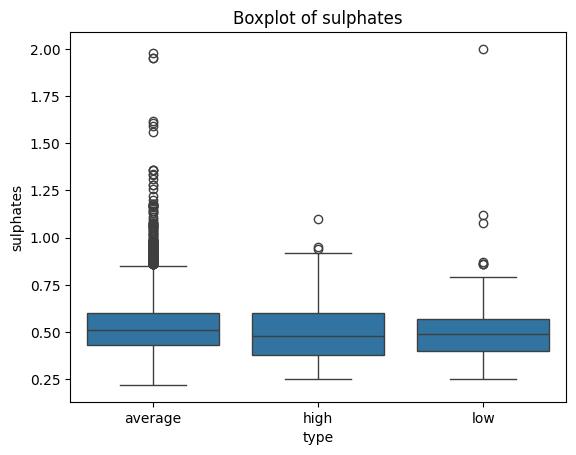

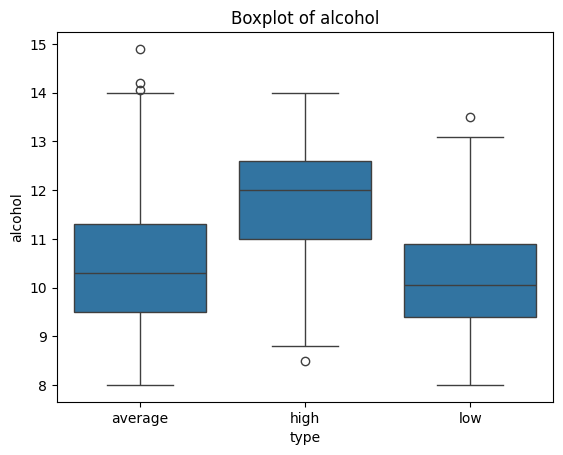

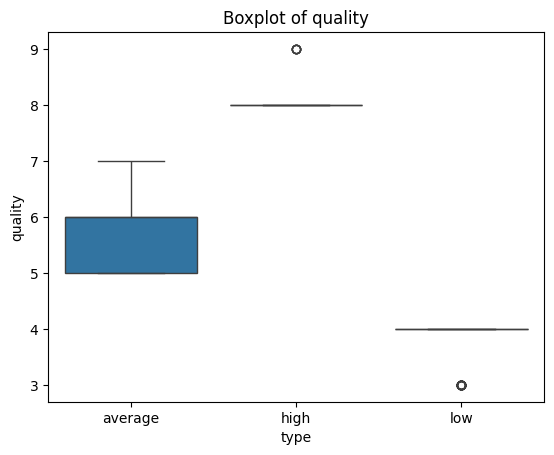

In [31]:
for col in df.columns:
    # Skip the 'wine_id' and 'type' columns in the loop
    if col not in ['wine_id', 'type']:
        sns.boxplot(data=df, x='type', y=col)
        plt.title(f'Boxplot of {col}')
        plt.show()

In [32]:
# !pip install --upgrade matplotlib


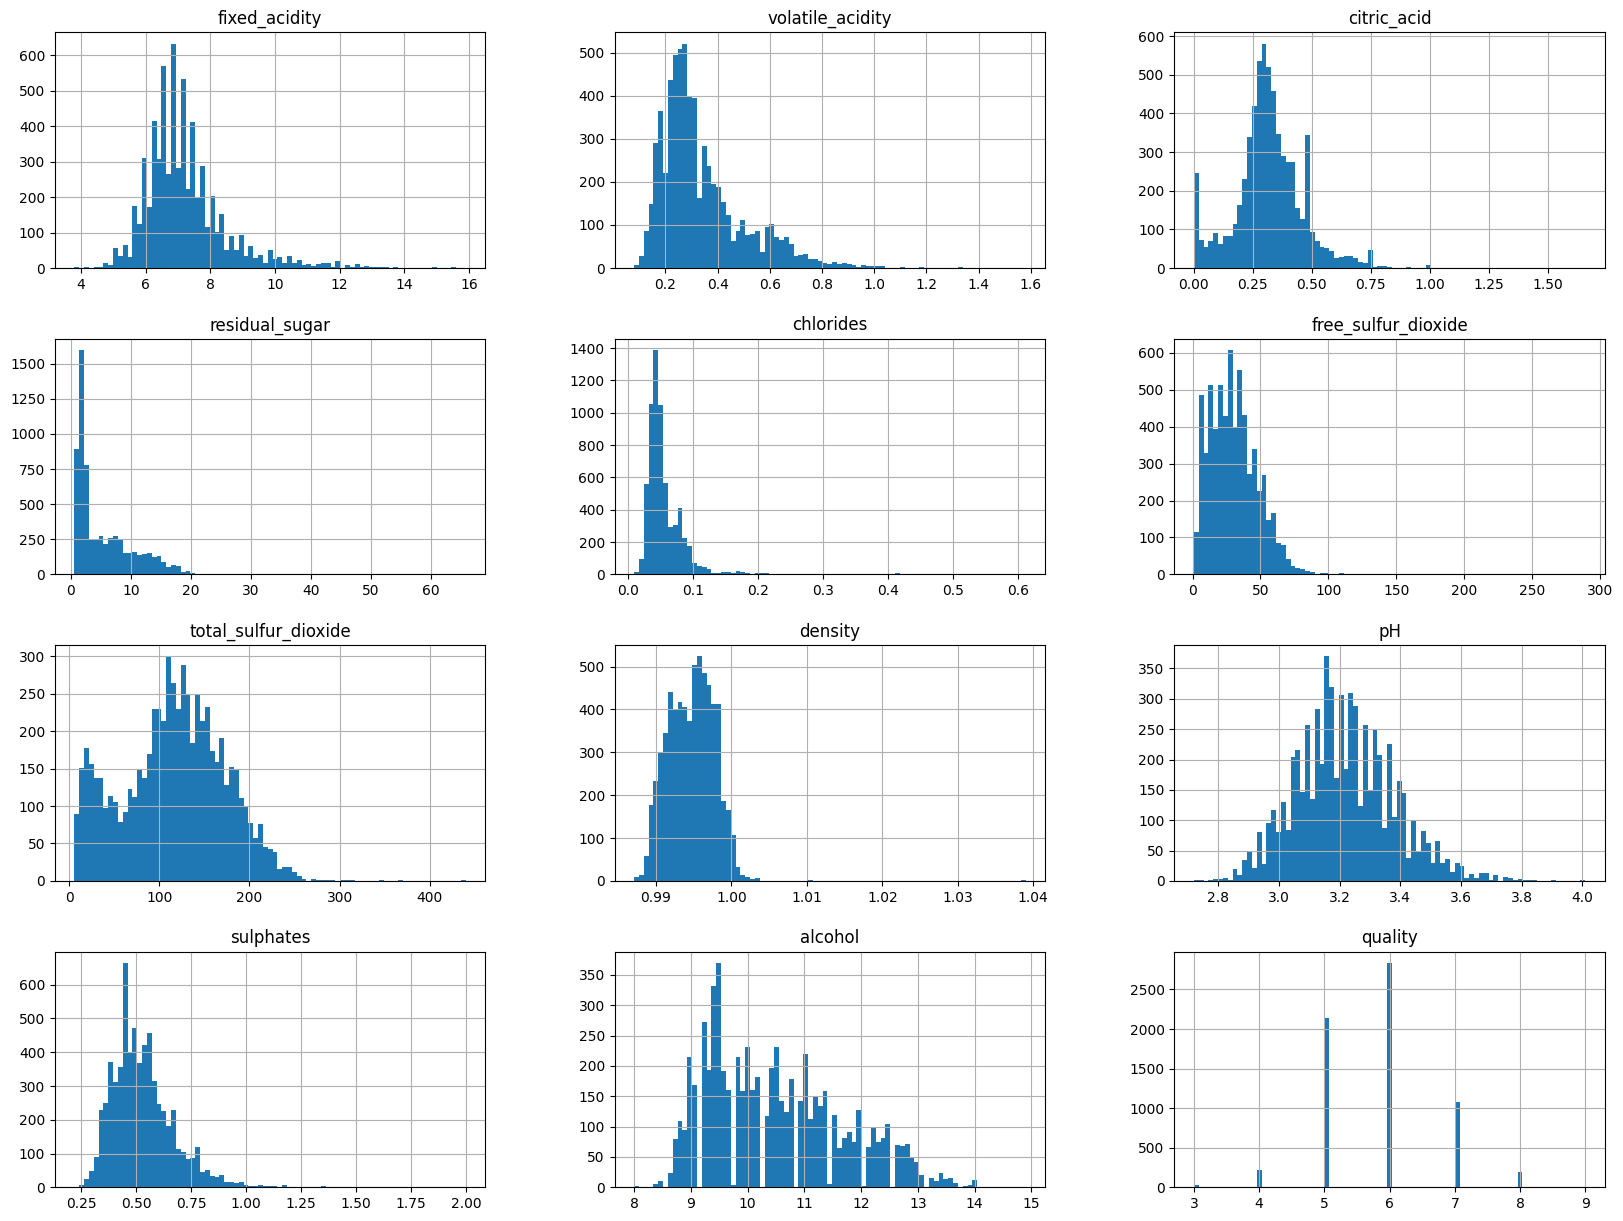

In [33]:
# did a histo plot on all columns in the train dataset
df.hist(bins=81, figsize=(20,15))

plt.show()

In [34]:


print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)


Pandas version: 2.2.0
Matplotlib version: 3.8.2


In [35]:
# Split before bivariate exploring
# Switched to random state 123 to match Jorge
def split_data(df):
    '''
    split continuouse data into train, validate, test;target variable being qualit

    returns train, validate, test
    '''

    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=123,
                                   stratify = df['quality'])
    train, validate = train_test_split(train_val,
                                   train_size=0.75,
                                   random_state=123,
                                   stratify=train_val['quality'])
    
    print(f'Train: {len(train)/len(df)}')
    print(f'Validate: {len(validate)/len(df)}')
    print(f'Test: {len(test)/len(df)}')
    

    return train, validate, test


In [36]:
train, validate, test = split_data(df)

Train: 0.5998152993689395
Validate: 0.20009235031553024
Test: 0.20009235031553024


In [37]:
train.shape

(3897, 14)

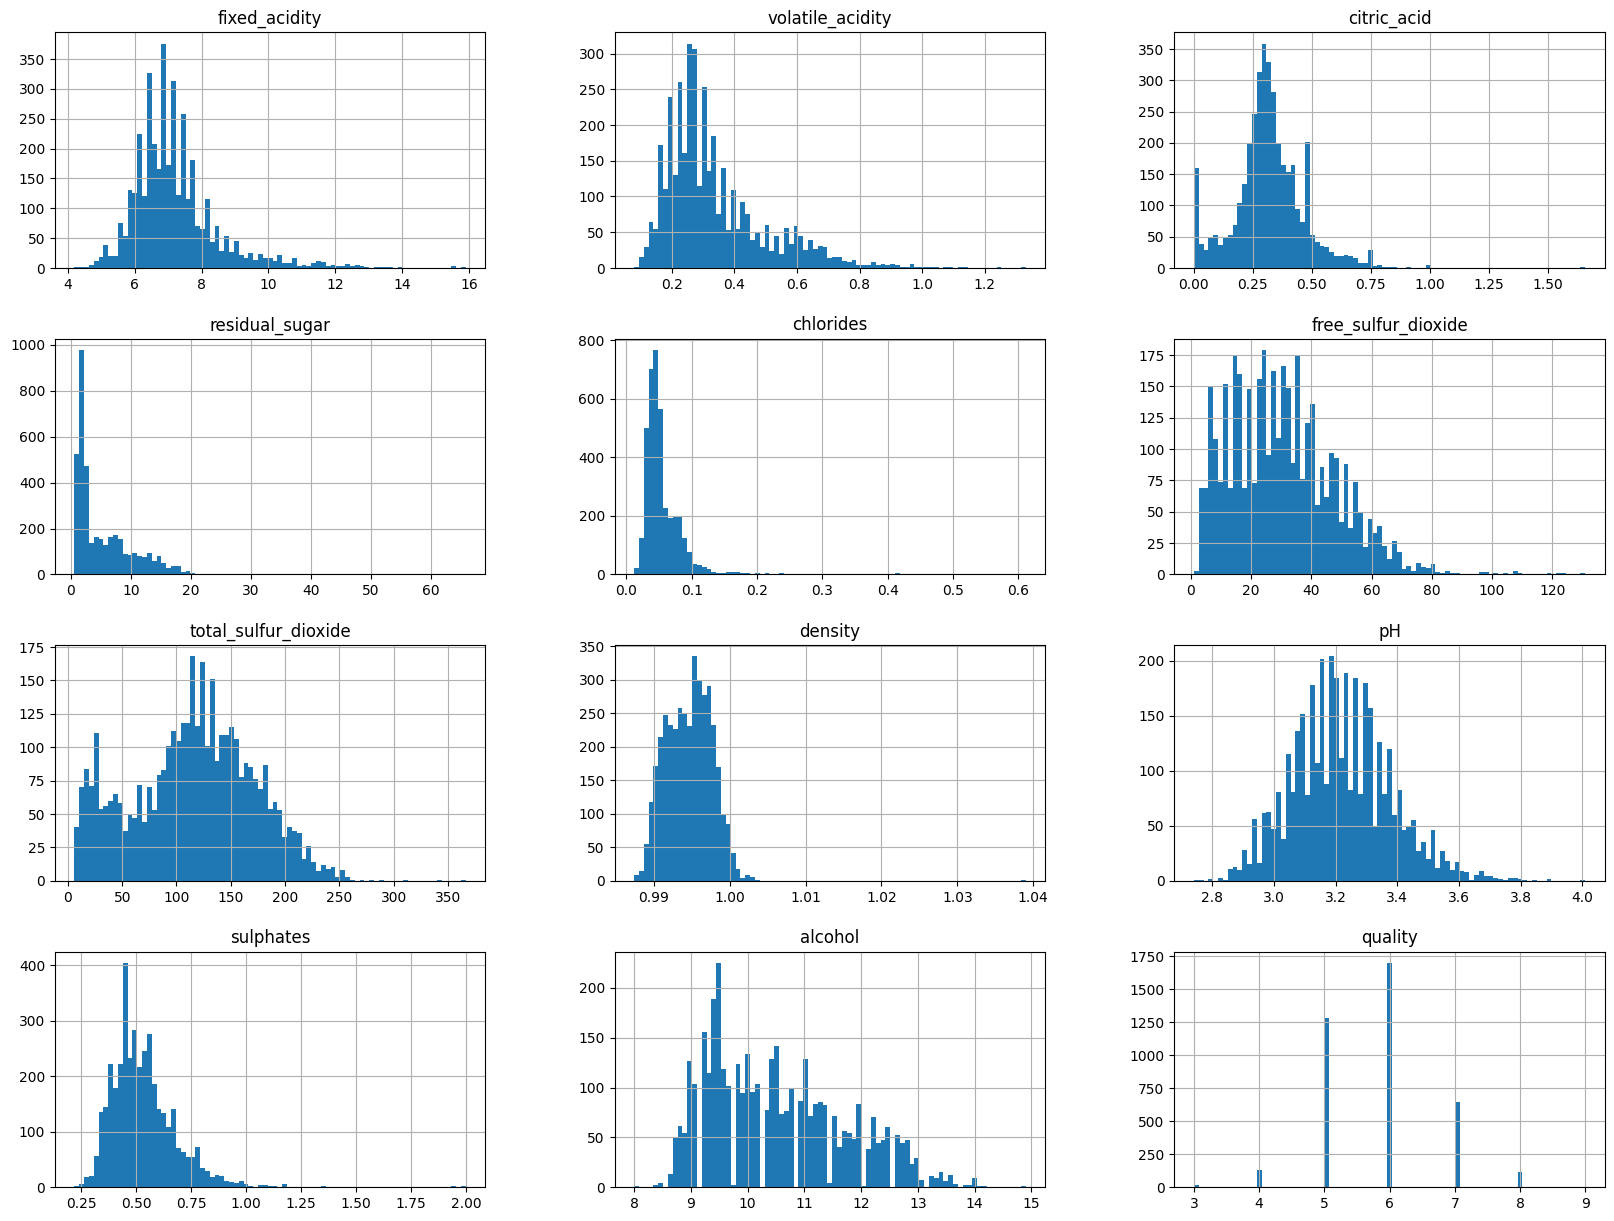

In [38]:
train.hist(bins=81, figsize=(20,15))
plt.show()

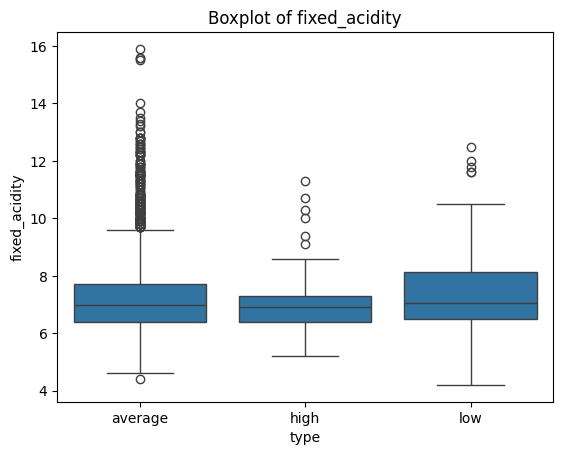

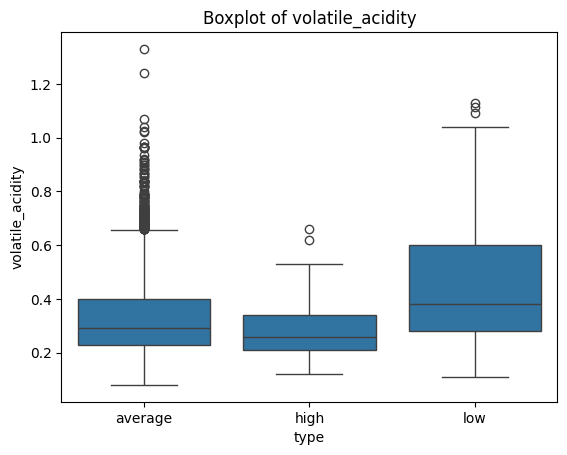

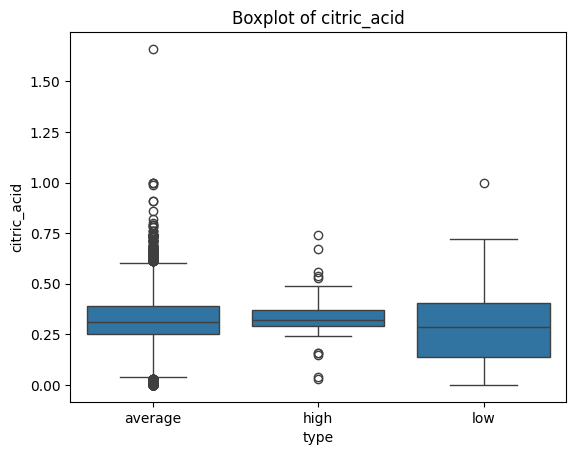

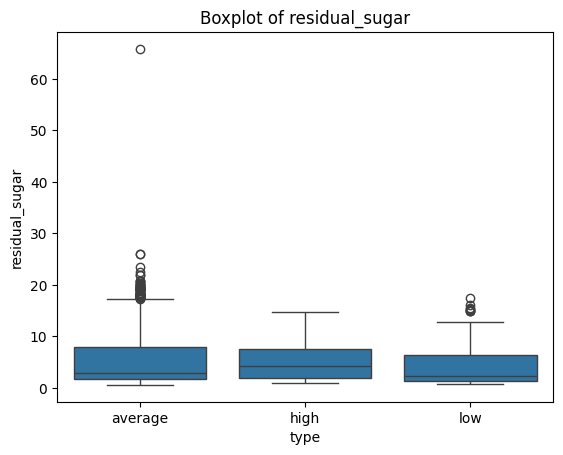

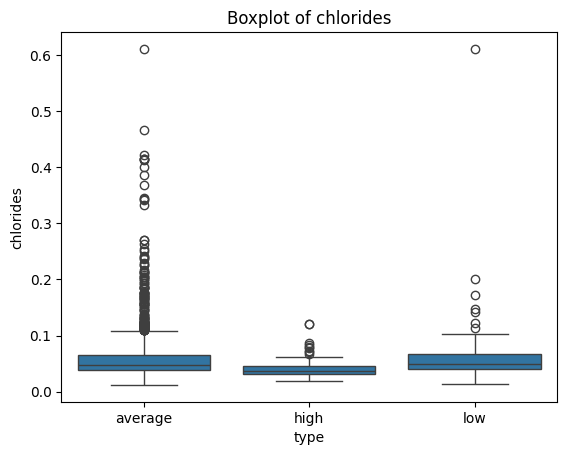

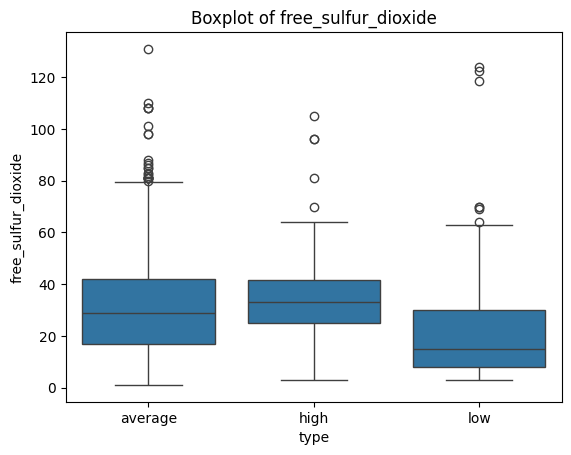

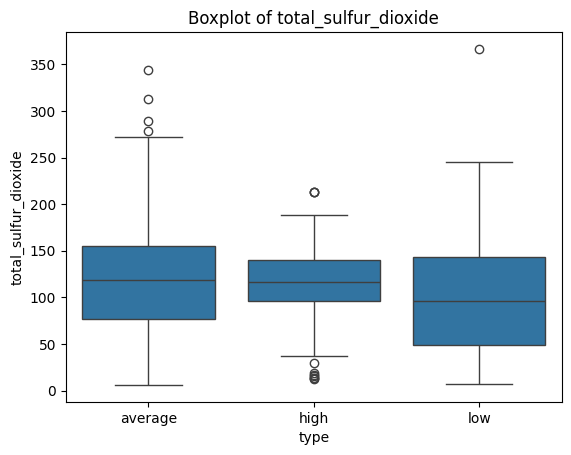

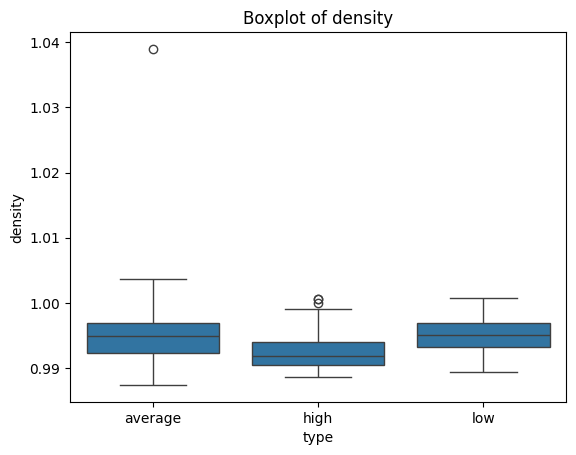

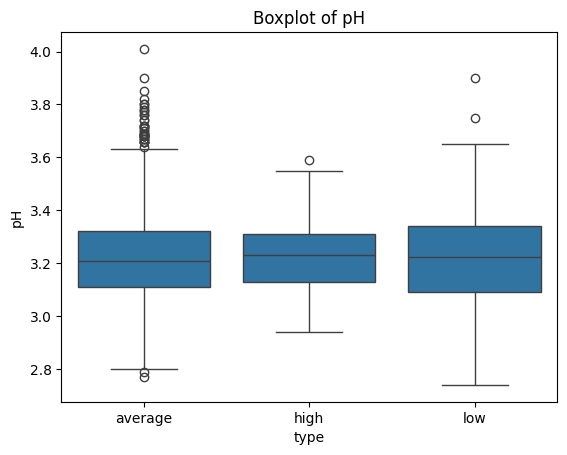

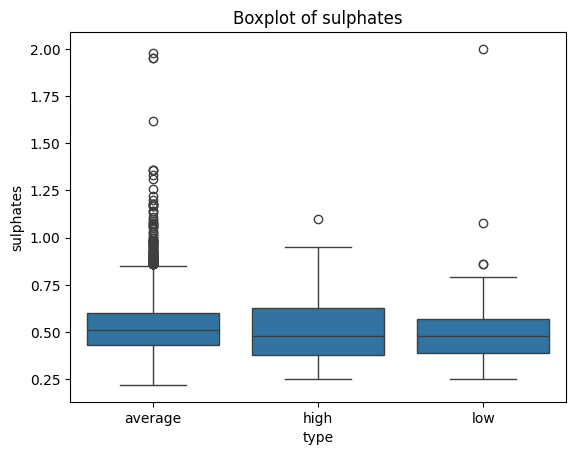

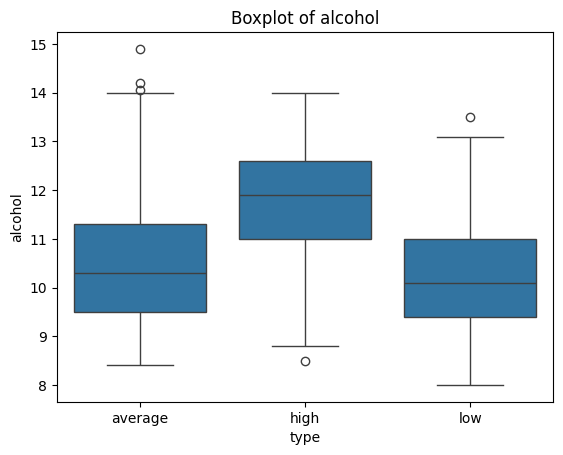

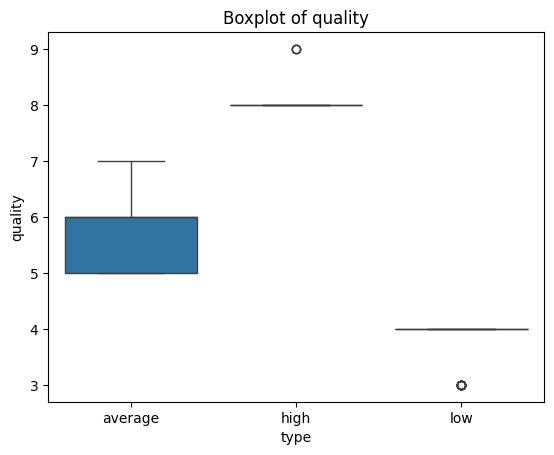

In [39]:
for col in train:
    # Skip the 'wine_id' and 'type' columns in the loop
    if col not in ['wine_id', 'type']:
        sns.boxplot(data=train, x='type', y=col)
        plt.title(f'Boxplot of {col}')
        plt.show()

In [40]:
check_columns(train)

Total rows: 3897
Total columns: 14


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,96,0,0.00,"[6.4, 6.1, 7.6, 5.1, 8.2, 7.1, 6.7, 7.2, 6.6, 6.3, 7.3, 8.1, 7.4, 5.8, 6.5, 6.0, 10.3,...","[4.2, 15.9, 7.205735180908391]"
1,volatile_acidity,float64,170,0,0.00,"[0.16, 0.28, 0.2, 0.52, 0.15, 0.17, 0.26, 0.62, 0.57, 0.25, 0.38, 0.46, 0.205, 0.33, 0...","[0.08, 1.33, 0.33859892224788296]"
2,citric_acid,float64,85,0,0.00,"[0.32, 0.27, 0.26, 0.06, 0.22, 0.48, 0.43, 0.37, 0.24, 0.05, 0.39, 0.29, 0.18, 0.33, 0...","[0.0, 1.66, 0.31855016679497045]"
3,residual_sugar,float64,285,0,0.00,"[8.75, 4.7, 4.8, 2.7, 12.8, 1.3, 5.5, 1.1, 2.3, 18.95, 2.4, 1.7, 10.6, 1.5, 13.2, 2.2,...","[0.6, 65.8, 5.400821144470105]"
4,chlorides,float64,189,0,0.00,"[0.038, 0.03, 0.033, 0.052, 0.039, 0.023, 0.025, 0.081, 0.136, 0.077, 0.045, 0.027, 0....","[0.012, 0.611, 0.056020785219399544]"
5,free_sulfur_dioxide,float64,117,0,0.00,"[38.0, 56.0, 26.0, 30.0, 51.0, 24.0, 33.0, 31.0, 6.0, 16.0, 42.0, 15.0, 18.0, 57.0, 46...","[1.0, 131.0, 30.58570695406723]"
6,total_sulfur_dioxide,float64,263,0,0.00,"[118.0, 140.0, 76.0, 79.0, 150.0, 190.0, 132.0, 105.0, 62.0, 36.0, 155.0, 93.0, 34.0, ...","[6.0, 366.5, 115.36861688478317]"
7,density,float64,871,0,0.00,"[0.99449, 0.99042, 0.99076, 0.9932, 0.99535, 0.995, 0.99067, 0.99082, 0.9934, 0.99564,...","[0.98742, 1.03898, 0.9946682858609187]"
8,pH,float64,106,0,0.00,"[3.19, 3.16, 2.98, 3.32, 3.23, 3.5, 3.11, 3.06, 3.41, 3.38, 2.97, 3.18, 3.39, 3.09, 3....","[2.74, 4.01, 3.220395175776238]"
9,sulphates,float64,102,0,0.00,"[0.41, 0.42, 0.49, 0.43, 0.45, 0.56, 0.33, 0.32, 0.6, 0.47, 0.54, 0.69, 0.61, 0.48, 0....","[0.22, 2.0, 0.5336617911213754]"


__What does total_sulfer_dioxide and volitile acidity look like plotted?__

<Axes: xlabel='total_sulfur_dioxide', ylabel='volatile_acidity'>

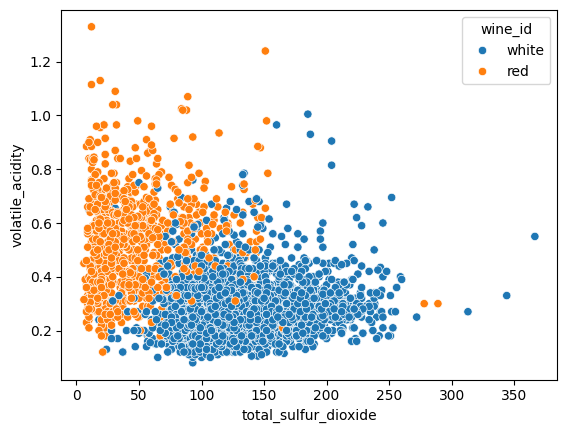

In [41]:
sns.scatterplot(train, x='total_sulfur_dioxide',y='volatile_acidity', hue= 'wine_id')

__What about fixed_acidity and sulphates__

<Axes: xlabel='fixed_acidity', ylabel='sulphates'>

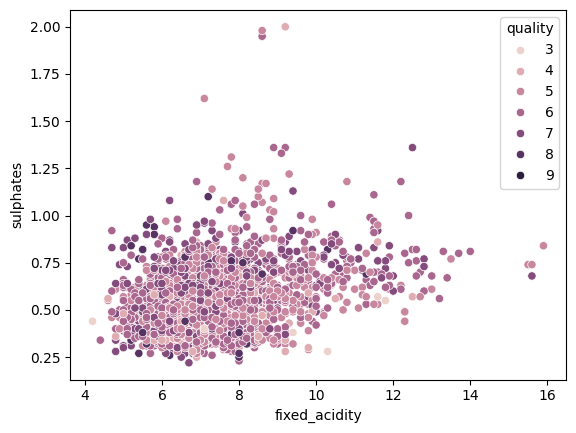

In [42]:
sns.scatterplot(train, x='fixed_acidity', y='sulphates', hue='quality')

In [43]:
explore_cols = ['quality', 'alcohol', 'density', 'wine_id']

In [44]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id,type
2919,6.40,0.16,0.32,8.75,0.04,38.00,118.00,0.99,3.19,0.41,10.70,5,white,average
3378,6.10,0.28,0.27,4.70,0.03,56.00,140.00,0.99,3.16,0.42,12.50,8,white,high
3365,7.60,0.20,0.26,4.80,0.03,26.00,76.00,0.99,2.98,0.49,12.30,7,white,average


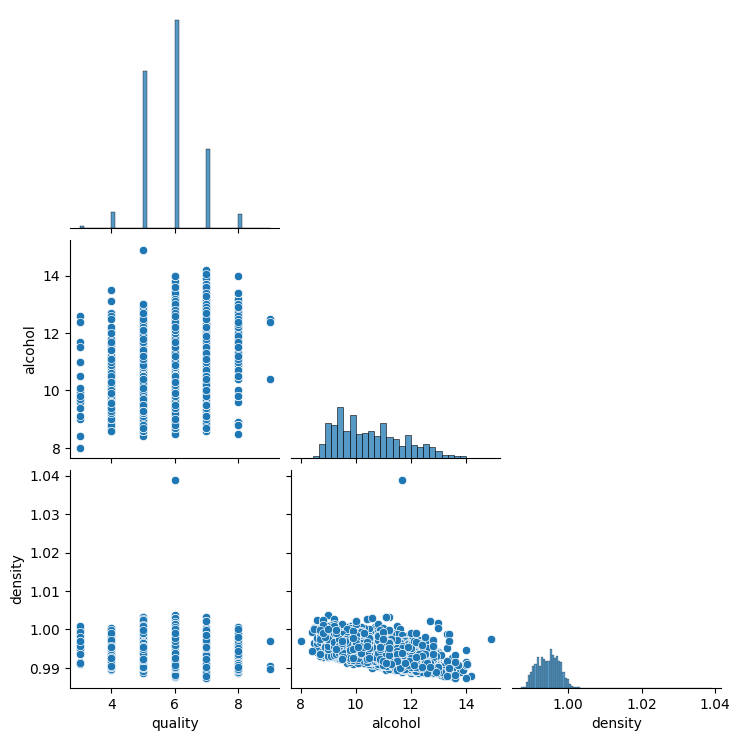

In [45]:
sns.pairplot(data=train[explore_cols], corner=True)

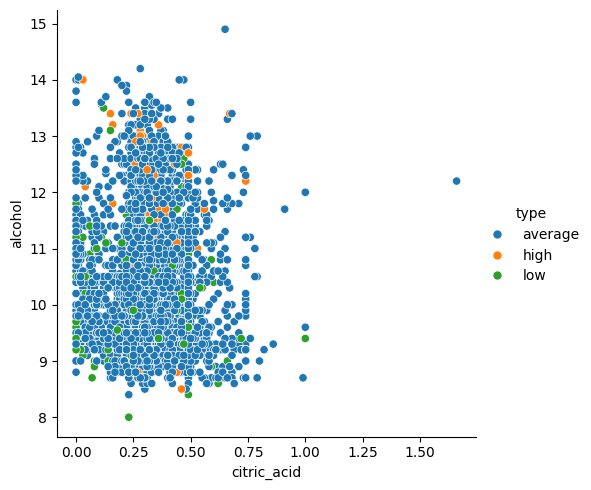

In [46]:
sns.relplot(train, x = 'citric_acid', y= 'alcohol', hue='type')
plt.show()

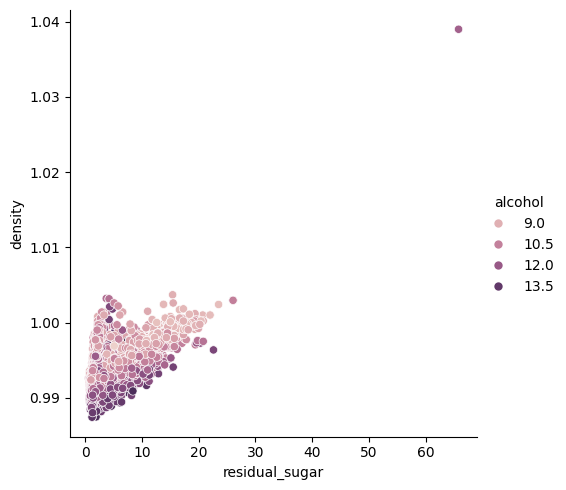

In [47]:
sns.relplot(train, x = 'residual_sugar', y= 'density', hue='alcohol')
plt.show()

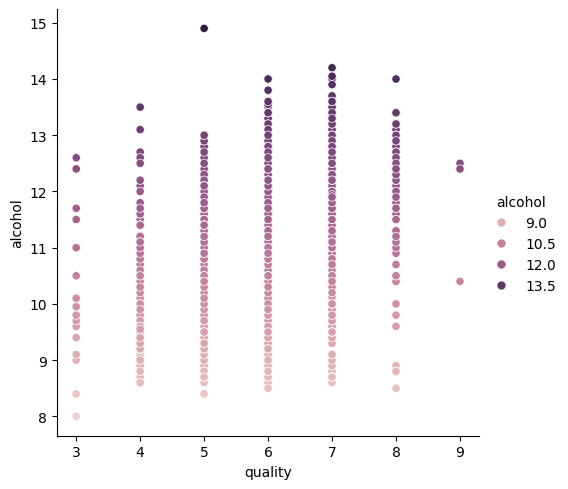

In [48]:
sns.relplot(train, x = 'quality', y= 'alcohol', hue='alcohol')
plt.show()

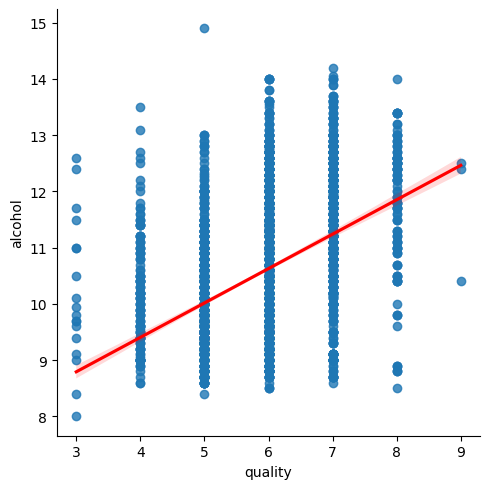

In [49]:
sns.lmplot(data=train, x='quality', y='alcohol',
           line_kws={'color':'red'})
plt.show()

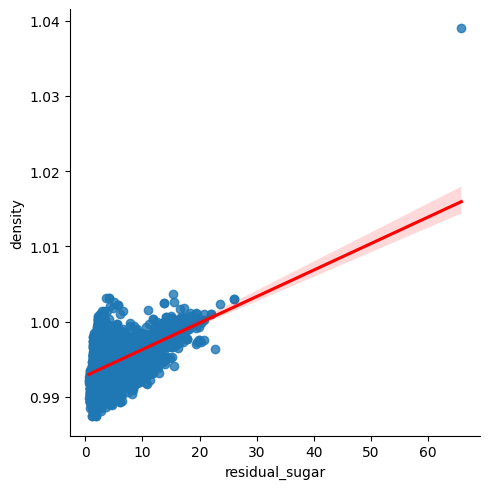

In [50]:
sns.lmplot(data=train, x='residual_sugar', y='density',
           line_kws={'color':'red'})
plt.show()

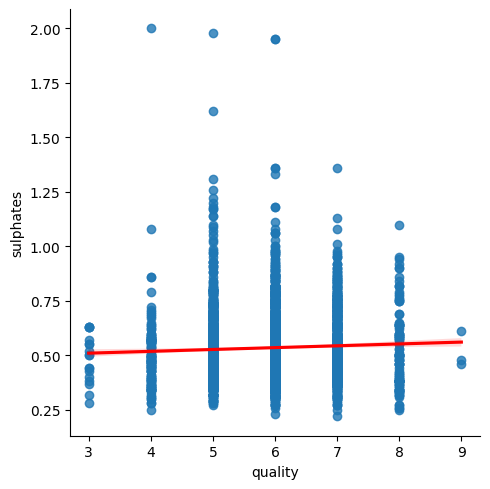

In [51]:
sns.lmplot(data=train, x='quality', y='sulphates',
           line_kws={'color':'red'})
plt.show()

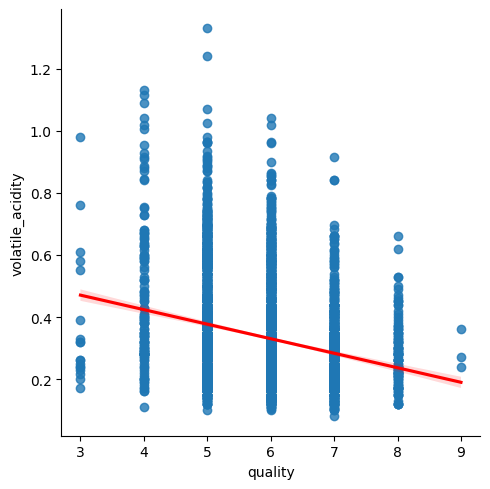

In [52]:
sns.lmplot(data=train, x='quality', y='volatile_acidity',
           line_kws={'color':'red'})
plt.show()

It appears that having a lower density has a higher quality rating

<Axes: xlabel='alcohol', ylabel='citric_acid'>

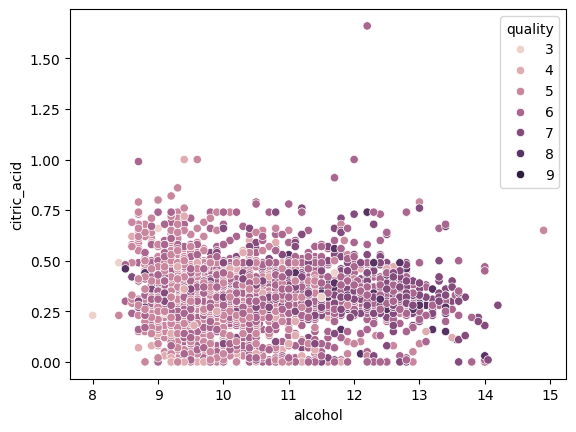

In [53]:
# residual sugar and quality
sns.scatterplot(train, x='alcohol', y='citric_acid', hue='quality')

- More alcohol content better quality
- Citric Acid means for quality over 4 appear to be equal
- free_sulfur_dioxide means for quality over 4 appear to be equal

## Need to scale data, going to use robust

In [54]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id,type
2919,6.40,0.16,0.32,8.75,0.04,38.00,118.00,0.99,3.19,0.41,10.70,5,white,average
3378,6.10,0.28,0.27,4.70,0.03,56.00,140.00,0.99,3.16,0.42,12.50,8,white,high
3365,7.60,0.20,0.26,4.80,0.03,26.00,76.00,0.99,2.98,0.49,12.30,7,white,average


In [55]:
validate.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id,type
85,7.10,0.44,0.62,11.80,0.04,52.00,152.00,1.00,3.12,0.46,8.70,6,white,average
174,7.50,0.27,0.31,17.70,0.05,33.00,173.00,1.00,3.09,0.64,10.20,5,white,average
627,8.80,0.60,0.29,2.20,0.10,5.00,15.00,1.00,3.36,0.49,9.10,5,red,average


In [56]:
test.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id,type
1011,8.90,0.32,0.31,2.00,0.09,12.00,19.00,1.00,3.17,0.55,10.40,6,red,average
4619,6.40,0.62,0.12,4.70,0.06,33.00,196.00,1.00,3.22,0.48,8.90,5,white,average
308,6.20,0.33,0.27,4.90,0.04,30.00,134.00,0.99,3.20,0.42,10.40,7,white,average


In [57]:
dummy_df = pd.get_dummies(train.wine_id, dtype=int, drop_first=True)
train = pd.concat([train, dummy_df], axis=1)

dummy_df = pd.get_dummies(validate.wine_id, dtype=int, drop_first=True)
validate = pd.concat([validate, dummy_df], axis=1)

dummy_df = pd.get_dummies(test.wine_id, dtype=int, drop_first=True)
test = pd.concat([test, dummy_df], axis=1)

In [58]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id,type,white
2919,6.40,0.16,0.32,8.75,0.04,38.00,118.00,0.99,3.19,0.41,10.70,5,white,average,1
3378,6.10,0.28,0.27,4.70,0.03,56.00,140.00,0.99,3.16,0.42,12.50,8,white,high,1
3365,7.60,0.20,0.26,4.80,0.03,26.00,76.00,0.99,2.98,0.49,12.30,7,white,average,1


In [59]:
# We'll do exploration and train our model on the train data
X_train = train.drop(columns=["quality", 'type'])
y_train = train["type"]

# We tune our model on validate, since it will be out-of-sample until we use it.
X_validate = validate.drop(columns=["quality" ,'type'])
y_validate = validate["type"]

# Keep the test separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=["quality", 'type'])
y_test = test["type"]


In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [61]:
check_columns(train)

Total rows: 3897
Total columns: 15


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,96,0,0.00,"[6.4, 6.1, 7.6, 5.1, 8.2, 7.1, 6.7, 7.2, 6.6, 6.3, 7.3, 8.1, 7.4, 5.8, 6.5, 6.0, 10.3,...","[4.2, 15.9, 7.205735180908391]"
1,volatile_acidity,float64,170,0,0.00,"[0.16, 0.28, 0.2, 0.52, 0.15, 0.17, 0.26, 0.62, 0.57, 0.25, 0.38, 0.46, 0.205, 0.33, 0...","[0.08, 1.33, 0.33859892224788296]"
2,citric_acid,float64,85,0,0.00,"[0.32, 0.27, 0.26, 0.06, 0.22, 0.48, 0.43, 0.37, 0.24, 0.05, 0.39, 0.29, 0.18, 0.33, 0...","[0.0, 1.66, 0.31855016679497045]"
3,residual_sugar,float64,285,0,0.00,"[8.75, 4.7, 4.8, 2.7, 12.8, 1.3, 5.5, 1.1, 2.3, 18.95, 2.4, 1.7, 10.6, 1.5, 13.2, 2.2,...","[0.6, 65.8, 5.400821144470105]"
4,chlorides,float64,189,0,0.00,"[0.038, 0.03, 0.033, 0.052, 0.039, 0.023, 0.025, 0.081, 0.136, 0.077, 0.045, 0.027, 0....","[0.012, 0.611, 0.056020785219399544]"
5,free_sulfur_dioxide,float64,117,0,0.00,"[38.0, 56.0, 26.0, 30.0, 51.0, 24.0, 33.0, 31.0, 6.0, 16.0, 42.0, 15.0, 18.0, 57.0, 46...","[1.0, 131.0, 30.58570695406723]"
6,total_sulfur_dioxide,float64,263,0,0.00,"[118.0, 140.0, 76.0, 79.0, 150.0, 190.0, 132.0, 105.0, 62.0, 36.0, 155.0, 93.0, 34.0, ...","[6.0, 366.5, 115.36861688478317]"
7,density,float64,871,0,0.00,"[0.99449, 0.99042, 0.99076, 0.9932, 0.99535, 0.995, 0.99067, 0.99082, 0.9934, 0.99564,...","[0.98742, 1.03898, 0.9946682858609187]"
8,pH,float64,106,0,0.00,"[3.19, 3.16, 2.98, 3.32, 3.23, 3.5, 3.11, 3.06, 3.41, 3.38, 2.97, 3.18, 3.39, 3.09, 3....","[2.74, 4.01, 3.220395175776238]"
9,sulphates,float64,102,0,0.00,"[0.41, 0.42, 0.49, 0.43, 0.45, 0.56, 0.33, 0.32, 0.6, 0.47, 0.54, 0.69, 0.61, 0.48, 0....","[0.22, 2.0, 0.5336617911213754]"


In [62]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id,type,white
2919,6.40,0.16,0.32,8.75,0.04,38.00,118.00,0.99,3.19,0.41,10.70,5,white,average,1
3378,6.10,0.28,0.27,4.70,0.03,56.00,140.00,0.99,3.16,0.42,12.50,8,white,high,1
3365,7.60,0.20,0.26,4.80,0.03,26.00,76.00,0.99,2.98,0.49,12.30,7,white,average,1


In [63]:
correlation = train.drop(columns={'type','wine_id'}).corr()
print(correlation["quality"].sort_values(ascending=False), "\n")

quality                                1.00
alcohol                                0.44
white                                  0.10
citric_acid                            0.08
sulphates                              0.05
free_sulfur_dioxide                    0.05
pH                                     0.02
residual_sugar                        -0.05
total_sulfur_dioxide                  -0.06
fixed_acidity                         -0.06
chlorides                             -0.18
volatile_acidity                      -0.25
density                               -0.30
Name: quality, dtype: float64 



__Going to scale every continous feature__

In [64]:
X_test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_id,white
1011,8.90,0.32,0.31,2.00,0.09,12.00,19.00,1.00,3.17,0.55,10.40,red,0
4619,6.40,0.62,0.12,4.70,0.06,33.00,196.00,1.00,3.22,0.48,8.90,white,1
308,6.20,0.33,0.27,4.90,0.04,30.00,134.00,0.99,3.20,0.42,10.40,white,1
3085,8.50,0.23,0.40,9.90,0.04,24.00,88.00,1.00,3.02,0.42,10.50,white,1
1141,9.30,0.34,0.49,7.30,0.05,30.00,146.00,1.00,3.17,0.61,10.20,white,1


In [65]:
X_train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_id', 'white'],
      dtype='object')

## decided to try a robust scaler create a function for it

In [66]:
def model_prep_wine_scaled(X_train, X_validate, X_test):
    '''
    Takes the X train, validate, and test and fits them to a RobustScaler
    return X_train_scaled, X_validate_scaled, X_test_scaled 
    
    '''
    
    # makes a copy of the dataframes
    X_train_scaled = X_train.copy()
    X_valid_scaled = X_validate.copy()
    X_test_scaled = X_test.copy()

    columns_to_scale = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                        'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                        'pH', 'sulphates', 'alcohol']

    scaler = RobustScaler()

    X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
    X_valid_scaled[columns_to_scale] = scaler.transform(X_validate[columns_to_scale])
    X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

    return X_train_scaled, X_valid_scaled, X_test_scaled

In [67]:
X_train_scaled, X_valid_scaled, X_test_scaled = model_prep_wine_scaled(X_train, X_validate, X_test)

In [68]:
X_train_scaled.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_id,white
2919,-0.46,-0.76,0.07,0.94,-0.35,0.38,0.00,-0.07,-0.10,-0.59,0.22,white,1
3378,-0.69,-0.06,-0.29,0.29,-0.65,1.12,0.28,-0.95,-0.24,-0.53,1.22,white,1
3365,0.46,-0.53,-0.36,0.31,-0.54,-0.12,-0.54,-0.88,-1.10,-0.12,1.11,white,1


In [69]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3897 entries, 2919 to 530
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3897 non-null   float64
 1   volatile_acidity      3897 non-null   float64
 2   citric_acid           3897 non-null   float64
 3   residual_sugar        3897 non-null   float64
 4   chlorides             3897 non-null   float64
 5   free_sulfur_dioxide   3897 non-null   float64
 6   total_sulfur_dioxide  3897 non-null   float64
 7   density               3897 non-null   float64
 8   pH                    3897 non-null   float64
 9   sulphates             3897 non-null   float64
 10  alcohol               3897 non-null   float64
 11  wine_id               3897 non-null   object 
 12  white                 3897 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 555.3+ KB


Going to use alcohol, white, and citric_acid for features

In [70]:
X = X_train_scaled[['alcohol', 'white', 'citric_acid']]
X.head()

,alcohol,white,citric_acid
2919,0.22,1,0.07
3378,1.22,1,-0.29
3365,1.11,1,-0.36
1007,-0.56,1,-1.79
4449,0.22,1,-0.64


In [71]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [72]:
X_train_scaled.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_id,white
2919,-0.46,-0.76,0.07,0.94,-0.35,0.38,0.00,-0.07,-0.10,-0.59,0.22,white,1
3378,-0.69,-0.06,-0.29,0.29,-0.65,1.12,0.28,-0.95,-0.24,-0.53,1.22,white,1
3365,0.46,-0.53,-0.36,0.31,-0.54,-0.12,-0.54,-0.88,-1.10,-0.12,1.11,white,1
1007,-1.46,1.35,-1.79,-0.03,0.19,0.04,-0.50,-0.35,0.52,-0.47,-0.56,white,1
4449,-0.46,-0.06,-0.64,1.60,-0.31,0.92,0.41,0.11,0.10,-0.47,0.22,white,1


* inertia = WCSS (Within Cluster Sum of Square of distance between datapoints from centroid)

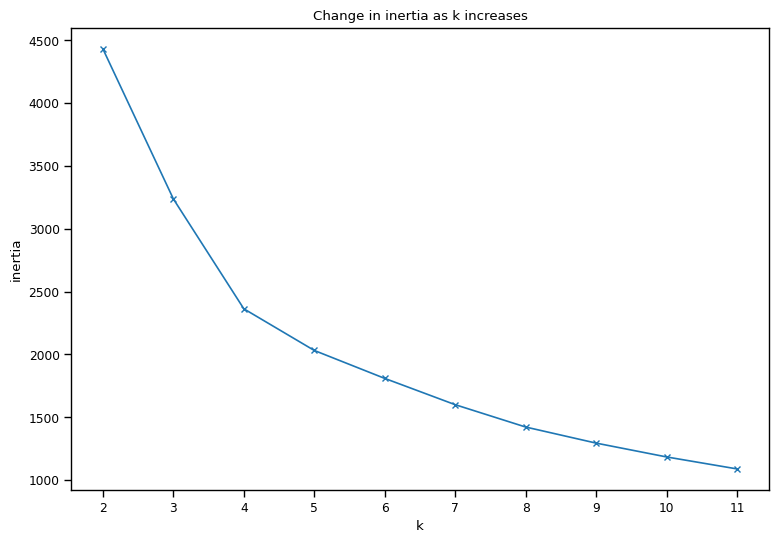

In [73]:
with sns.plotting_context(context='paper'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

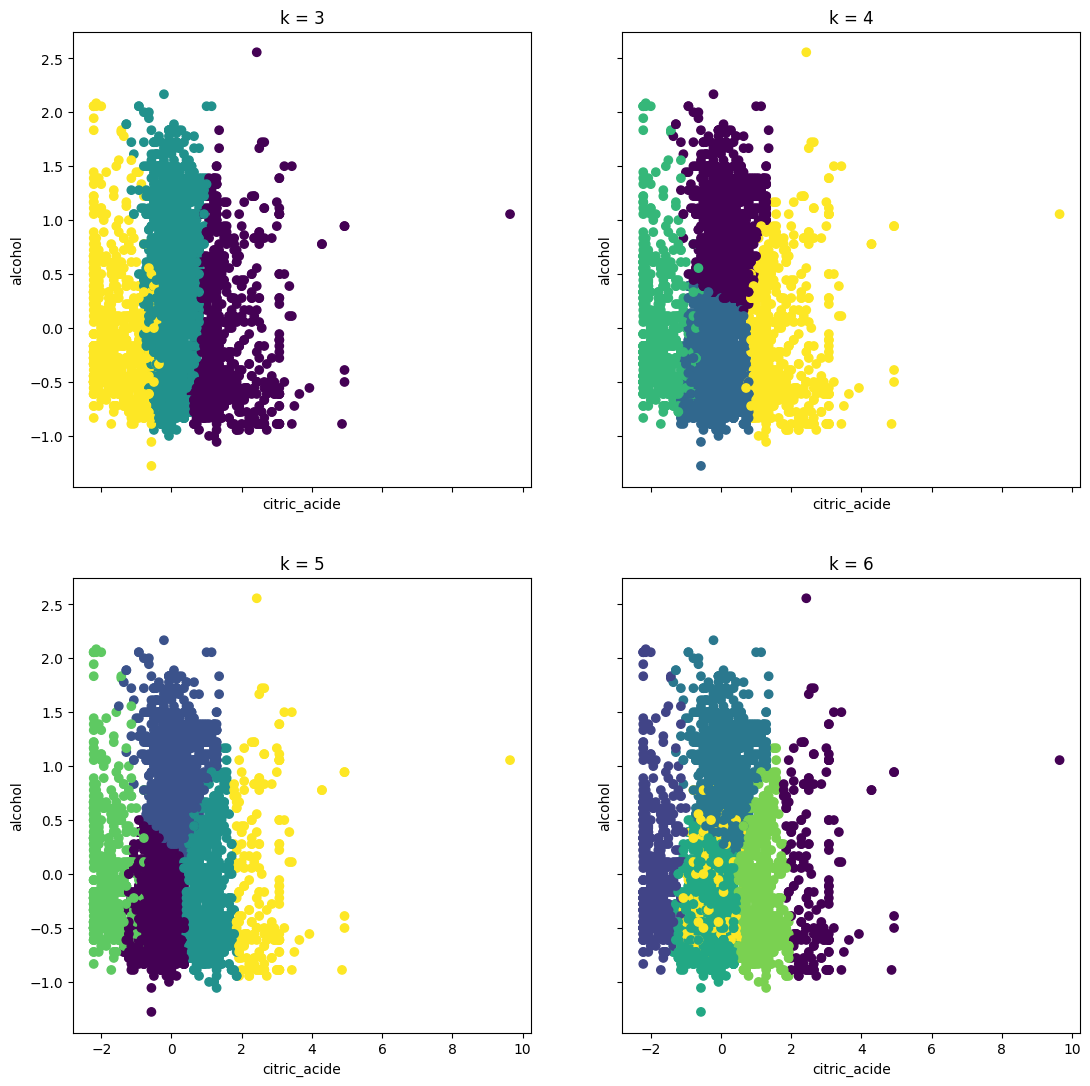

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.citric_acid, X.alcohol, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='citric_acide', ylabel='alcohol')

In [76]:
# feature: 'type'
y_train.head()

2919    average
3378       high
3365    average
1007    average
4449    average
Name: type, dtype: object

In [78]:
y_train.mode()

0    average
Name: type, dtype: object

In [82]:
y_train.value_counts()

type
average    3630
low         148
high        119
Name: count, dtype: int64

In [77]:
baseline_pred = np.repeat(y_train.mode(),len(y_train))
baseline_pred

0    average
0    average
0    average
0    average
0    average
      ...   
0    average
0    average
0    average
0    average
0    average
Name: type, Length: 3897, dtype: object

In [83]:
X_validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_id,white
85,7.10,0.44,0.62,11.80,0.04,52.00,152.00,1.00,3.12,0.46,8.70,white,1
174,7.50,0.27,0.31,17.70,0.05,33.00,173.00,1.00,3.09,0.64,10.20,white,1
627,8.80,0.60,0.29,2.20,0.10,5.00,15.00,1.00,3.36,0.49,9.10,red,0
1234,7.10,0.75,0.01,2.20,0.06,11.00,18.00,0.99,3.39,0.40,12.80,red,0
4068,7.10,0.44,0.27,8.40,0.06,60.00,160.00,0.99,3.16,0.36,11.80,white,1


In [84]:
# Drop the 'wine_id' column
X_train = X_train.drop('wine_id', axis=1)
X_validate = X_validate.drop('wine_id', axis=1)

In [85]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [86]:
y_train.head(3)

2919    average
3378       high
3365    average
Name: type, dtype: object

In [87]:
baseline_pred = np.repeat(y_train.mode(),len(y_train))
baseline_pred.head(3)

0    average
0    average
0    average
Name: type, dtype: object

In [88]:
X_train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,white
2919,6.40,0.16,0.32,8.75,0.04,38.00,118.00,0.99,3.19,0.41,10.70,1
3378,6.10,0.28,0.27,4.70,0.03,56.00,140.00,0.99,3.16,0.42,12.50,1
3365,7.60,0.20,0.26,4.80,0.03,26.00,76.00,0.99,2.98,0.49,12.30,1


In [89]:
baseline_acc = accuracy_score(y_train, baseline_pred)
baseline_acc

0.9314857582755967

In [90]:
# Cluster the data using KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(X_train)
X_train_clustered = kmeans.transform(X_train)
X_validate_clustered = kmeans.transform(X_validate)


In [92]:
X_train_clustered[:3]

array([[ 39.02099044,  89.54693012,  92.78808432,  41.7752191 ,
          9.70355363],
       [ 66.45806211,  66.803956  , 119.3345159 ,  23.80417332,
         32.28735219],
       [  7.55550125, 133.11848884,  48.97454652,  85.23944558,
         45.56915586]])

In [93]:
# Add the cluster labels to the original data
X_train_clustered_df = pd.DataFrame( X_train_clustered, columns=[f"cluster_{i}" for i in range(n_clusters)])
X_train_clustered_df.index = X_train.index

X_train_clustered_df = pd.concat([X_train, X_train_clustered_df], axis=1)
X_train_clustered_df.head(3)



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,white,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
2919,6.40,0.16,0.32,8.75,0.04,38.00,118.00,0.99,3.19,0.41,10.70,1,39.02,89.55,92.79,41.78,9.70
3378,6.10,0.28,0.27,4.70,0.03,56.00,140.00,0.99,3.16,0.42,12.50,1,66.46,66.80,119.33,23.80,32.29
3365,7.60,0.20,0.26,4.80,0.03,26.00,76.00,0.99,2.98,0.49,12.30,1,7.56,133.12,48.97,85.24,45.57


In [95]:
X_validate_clustered_df = pd.DataFrame( X_validate_clustered, 
                                       columns=[f"cluster_{i}" for i in range(n_clusters)])

X_validate_clustered_df.index = X_validate.index

X_validate_clustered_df = pd.concat([X_validate, X_validate_clustered_df], axis=1)
X_validate_clustered_df.head(3)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,white,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
85,7.10,0.44,0.62,11.80,0.04,52.00,152.00,1.00,3.12,0.46,8.70,1,75.91,54.48,129.54,12.56,38.53
174,7.50,0.27,0.31,17.70,0.05,33.00,173.00,1.00,3.09,0.64,10.20,1,92.21,39.29,146.10,19.51,53.24
627,8.80,0.60,0.29,2.20,0.10,5.00,15.00,1.00,3.36,0.49,9.10,0,69.85,197.27,15.83,149.47,109.29


In [96]:
# Train and evaluate RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_clustered_df, y_train)

y_train_pred_rf = rf.predict(X_train_clustered_df)

y_validate_pred_rf = rf.predict(X_validate_clustered_df)

# report_train_rf = classification_report(y_train, y_train_pred_rf)

# report_validate_rf = classification_report(y_validate, y_validate_pred_rf)

In [98]:
report_train_rf = classification_report(y_train, y_train_pred_rf)
print(report_train_rf)

              precision    recall  f1-score   support

     average       1.00      1.00      1.00      3630
        high       1.00      1.00      1.00       119
         low       1.00      1.00      1.00       148

    accuracy                           1.00      3897
   macro avg       1.00      1.00      1.00      3897
weighted avg       1.00      1.00      1.00      3897



In [99]:
report_validate_rf = classification_report(y_validate, y_validate_pred_rf)
print(report_validate_rf)

              precision    recall  f1-score   support

     average       0.94      1.00      0.97      1212
        high       0.92      0.28      0.43        39
         low       0.50      0.06      0.11        49

    accuracy                           0.94      1300
   macro avg       0.79      0.45      0.50      1300
weighted avg       0.92      0.94      0.92      1300



In [100]:
X_train_clustered_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,white,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
2919,6.40,0.16,0.32,8.75,0.04,38.00,118.00,0.99,3.19,0.41,10.70,1,39.02,89.55,92.79,41.78,9.70
3378,6.10,0.28,0.27,4.70,0.03,56.00,140.00,0.99,3.16,0.42,12.50,1,66.46,66.80,119.33,23.80,32.29
3365,7.60,0.20,0.26,4.80,0.03,26.00,76.00,0.99,2.98,0.49,12.30,1,7.56,133.12,48.97,85.24,45.57
1007,5.10,0.52,0.06,2.70,0.05,30.00,79.00,0.99,3.32,0.43,9.30,1,8.50,129.52,53.13,81.67,42.52
4449,6.40,0.28,0.22,12.80,0.04,51.00,150.00,1.00,3.23,0.43,10.70,1,73.78,56.54,127.41,13.49,36.50


In [101]:
# Train and evaluate KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train_clustered_df, y_train)

y_train_pred_knn = knn.predict(X_train_clustered_df.values)

y_validate_pred_knn = knn.predict(X_validate_clustered_df.values)

report_train_knn = classification_report(y_train, y_train_pred_knn)

report_validate_knn = classification_report(y_validate, y_validate_pred_knn)


In [102]:
print(report_train_knn)

              precision    recall  f1-score   support

     average       0.94      1.00      0.97      3630
        high       0.64      0.13      0.22       119
         low       0.80      0.03      0.05       148

    accuracy                           0.93      3897
   macro avg       0.79      0.39      0.41      3897
weighted avg       0.92      0.93      0.91      3897



In [104]:
print(report_validate_knn)

              precision    recall  f1-score   support

     average       0.93      0.99      0.96      1212
        high       0.17      0.03      0.04        39
         low       0.33      0.02      0.04        49

    accuracy                           0.93      1300
   macro avg       0.48      0.35      0.35      1300
weighted avg       0.89      0.93      0.90      1300



In [105]:
# Train and evaluate LogisticRegression
lr = LogisticRegression()

lr.fit(X_train_clustered_df, y_train)

y_train_pred_lr = lr.predict(X_train_clustered_df)

y_validate_pred_lr = lr.predict(X_validate_clustered_df)

report_train_lr = classification_report(y_train, y_train_pred_lr)

report_validate_lr = classification_report(y_validate, y_validate_pred_lr)

In [106]:
print(report_train_lr)

              precision    recall  f1-score   support

     average       0.93      1.00      0.96      3630
        high       0.00      0.00      0.00       119
         low       0.00      0.00      0.00       148

    accuracy                           0.93      3897
   macro avg       0.31      0.33      0.32      3897
weighted avg       0.87      0.93      0.90      3897



In [107]:
print(report_validate_lr)

              precision    recall  f1-score   support

     average       0.93      1.00      0.96      1212
        high       0.00      0.00      0.00        39
         low       0.00      0.00      0.00        49

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.87      0.93      0.90      1300



In [109]:
# Train and evaluate DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train_clustered_df, y_train)

y_train_pred_dt = dt.predict(X_train_clustered_df)

y_validate_pred_dt = dt.predict(X_validate_clustered_df)

report_train_dt = classification_report(y_train, y_train_pred_dt)

report_validate_dt = classification_report(y_validate, y_validate_pred_dt)

In [111]:
# Print classification reports for RandomForestClassifier
print("RandomForestClassifier:")
print("Training:")
print(report_train_rf)
print("Validation:")
print(report_validate_rf)
print(baseline_acc)

# Print classification reports for KNeighborsClassifier
print("\nKNeighborsClassifier:")
print("Training:")
print(report_train_knn)
print("Validation:")
print(report_validate_knn)
print(baseline_acc)

# Print classification reports for LogisticRegression
print("\nLogisticRegression:")
print("Training:")
print(report_train_lr)
print("Validation:")
print(report_validate_lr)
print(baseline_acc)

# Print classification reports for DecisionTreeClassifier
print("\nDecisionTreeClassifier:")
print("Training:")
print(report_train_dt)
print("Validation:")
print(report_validate_dt)

print('baseline accuracy',baseline_acc)

RandomForestClassifier:
Training:
              precision    recall  f1-score   support

     average       1.00      1.00      1.00      3630
        high       1.00      1.00      1.00       119
         low       1.00      1.00      1.00       148

    accuracy                           1.00      3897
   macro avg       1.00      1.00      1.00      3897
weighted avg       1.00      1.00      1.00      3897

Validation:
              precision    recall  f1-score   support

     average       0.94      1.00      0.97      1212
        high       0.92      0.28      0.43        39
         low       0.50      0.06      0.11        49

    accuracy                           0.94      1300
   macro avg       0.79      0.45      0.50      1300
weighted avg       0.92      0.94      0.92      1300

0.9314857582755967

KNeighborsClassifier:
Training:
              precision    recall  f1-score   support

     average       0.94      1.00      0.97      3630
        high       0.64      0.

In [112]:
X_test_scaled1 = X_test_scaled.drop(columns = ['wine_id'])

From the above classification accuracy report, we conclude that, 
Logistics Regression model is the best model for test dataset.

In [113]:
# Transform test data using the fitted KMeans model
X_test_clustered = kmeans.transform(X_test_scaled1)

# Fit the Logistic Regression model on the transformed training data
lr.fit(X_train_clustered, y_train)

# Predict on the transformed training, validation, and test data
y_train_pred_lr = lr.predict(X_train_clustered)
y_validate_pred_lr = lr.predict(X_validate_clustered)
y_test_pred_lr = lr.predict(X_test_clustered)

# Generate classification reports for training, validation, and test data
report_train_lr = classification_report(y_train, y_train_pred_lr)
report_validate_lr = classification_report(y_validate, y_validate_pred_lr)
report_test_lr = classification_report(y_test, y_test_pred_lr)



In [115]:
# Print classification reports for LogisticRegression
# Print the transformed test data
print(X_test_clustered)

# Print the predictions for the test data
print(y_test_pred_lr)

# Print the classification report for the test data
print()
print(report_test_lr)


[[ 88.01470555 214.83263479  35.60421639 167.16848417 127.10727643]
 [ 85.87379301 212.50499813  34.08869369 164.87046181 124.86906309]
 [ 86.55198488 213.26284951  34.54346941 165.61172156 125.58854901]
 ...
 [ 86.74195916 213.45811503  34.62987993 165.79650352 125.79551868]
 [ 85.51690876 212.31750852  33.29336306 164.64182233 124.61256258]
 [ 86.96000112 213.77016744  34.70205947 166.10494645 126.04262412]]
['average' 'average' 'average' ... 'average' 'average' 'average']

              precision    recall  f1-score   support

     average       0.93      1.00      0.96      1211
        high       0.00      0.00      0.00        40
         low       0.00      0.00      0.00        49

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.87      0.93      0.90      1300



In [ ]:
# Cluster the data using KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(X_train)
X_train_clustered = kmeans.transform(X_train)
X_validate_clustered = kmeans.transform(X_validate)

# Add the cluster labels to the original data
X_train_clustered_df = pd.DataFrame(
    X_train_clustered, columns=[f"cluster_{i}" for i in range(n_clusters)]
)
X_train_clustered_df.index = X_train.index
X_train_clustered_df = pd.concat([X_train, X_train_clustered_df], axis=1)

X_validate_clustered_df = pd.DataFrame(
    X_validate_clustered, columns=[f"cluster_{i}" for i in range(n_clusters)]
)
X_validate_clustered_df.index = X_validate.index
X_validate_clustered_df = pd.concat([X_validate, X_validate_clustered_df], axis=1)

# Train and evaluate RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_clustered_df, y_train)
y_train_pred_rf = rf.predict(X_train_clustered_df)
y_validate_pred_rf = rf.predict(X_validate_clustered_df)
report_train_rf = classification_report(y_train, y_train_pred_rf)
report_validate_rf = classification_report(y_validate, y_validate_pred_rf)

# Train and evaluate KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_clustered_df, y_train)
y_train_pred_knn = knn.predict(X_train_clustered_df)
y_validate_pred_knn = knn.predict(X_validate_clustered_df)
report_train_knn = classification_report(y_train, y_train_pred_knn)
report_validate_knn = classification_report(y_validate, y_validate_pred_knn)

# Train and evaluate LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_clustered_df, y_train)
y_train_pred_lr = lr.predict(X_train_clustered_df)
y_validate_pred_lr = lr.predict(X_validate_clustered_df)
report_train_lr = classification_report(y_train, y_train_pred_lr)
report_validate_lr = classification_report(y_validate, y_validate_pred_lr)

# Train and evaluate DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_clustered_df, y_train)
y_train_pred_dt = dt.predict(X_train_clustered_df)
y_validate_pred_dt = dt.predict(X_validate_clustered_df)
report_train_dt = classification_report(y_train, y_train_pred_dt)
report_validate_dt = classification_report(y_validate, y_validate_pred_dt)
